In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [19]:
lambdas = 2     #srednia liczba kontaktów powodujących infekcje
gamma = 0.95       #wspolczynnik wyzdrowien
mi = 0.2         #rozrodzczosc i smiertelnosc naraz
sigma = lambdas/(gamma+mi)  #sigma<1 -> I(t)maleje, sigma>1 -> dla I0 male rośnie, dla I0 duże stabilizuje sie

def SIS(t,z):
    I = z
    dIdt = - lambdas * I**2+(lambdas-(gamma+mi))*I
    return [dIdt]

N = 100
I0 = 1
z0 = [int(I0)]


t_span = (0,10)
t_eval = np.linspace(0, 10, 100)

sol = solve_ivp(SIS,t_span,z0,t_eval=t_eval,method='RK45')

print(f"Sigma = {sigma}")

Sigma = 1.7391304347826089


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


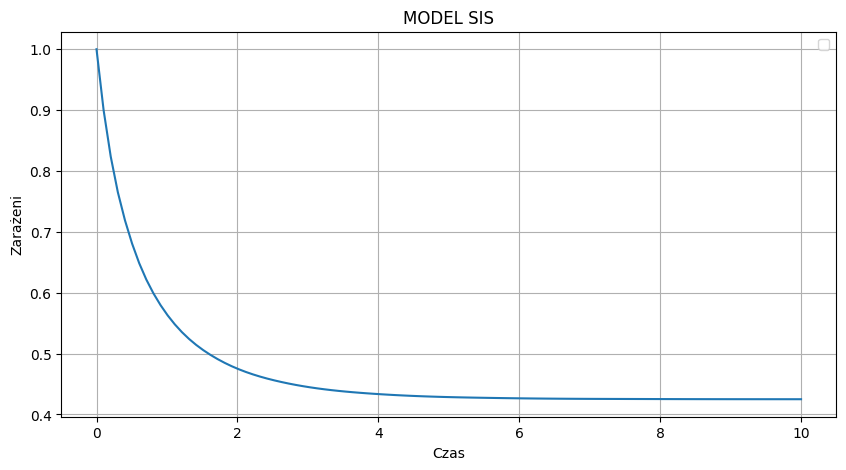

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(sol.t,sol.y[0], label="")
plt.xlabel("Czas")
plt.ylabel("Zarażeni")
plt.legend()
plt.title("MODEL SIS")
plt.grid()
plt.show()

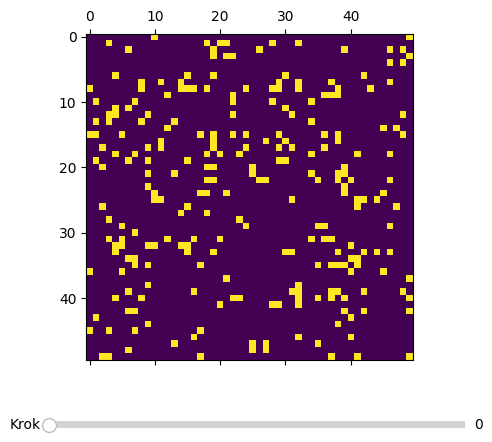

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Parametry symulacji
size = 50  # Rozmiar siatki (size x size)
infection_prob = 0.3  # Prawdopodobieństwo zakażenia sąsiada
recovery_prob = 0.1   # Prawdopodobieństwo wyzdrowienia
steps = 200  # Liczba kroków symulacji

# Inicjalizacja siatki: 0 - zdrowy (S), 1 - zakażony (I)
grid = np.zeros((size, size), dtype=int)

# Losowe początkowe infekcje
initial_infected = np.random.choice(range(size*size), size*size // 10, replace=False)
for idx in initial_infected:
    grid[idx // size, idx % size] = 1

# Przechowywanie stanów siatki w czasie
history = [grid.copy()]
for _ in range(steps - 1):
    new_grid = history[-1].copy()
    for i in range(size):
        for j in range(size):
            if history[-1][i, j] == 1:  # Zainfekowany osobnik
                if np.random.rand() < recovery_prob:
                    new_grid[i, j] = 0  # Wyzdrowienie
                else:
                    # Próba zakażenia sąsiadów (góra, dół, lewo, prawo)
                    for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        ni, nj = i + di, j + dj
                        if 0 <= ni < size and 0 <= nj < size and history[-1][ni, nj] == 0:
                            if np.random.rand() < infection_prob:
                                new_grid[ni, nj] = 1
    history.append(new_grid.copy())

# Tworzenie interaktywnej wizualizacji
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
mat = ax.matshow(history[0], cmap='viridis')

# Suwak do wyboru momentu w czasie
ax_slider = plt.axes([0.2, 0.05, 0.65, 0.03])
slider = Slider(ax_slider, 'Krok', 0, steps - 1, valinit=0, valfmt='%d')

def update(val):
    step = int(slider.val)
    mat.set_data(history[step])
    fig.canvas.draw_idle()

slider.on_changed(update)
plt.show()
